# Aula 1 Tesseract OCR



###Preparação do Ambiente e OCR no COLAB

In [ ]:
!pip install opencv-python==4.6.0
!sudo apt install tesseract-ocr
!pip install pytesseract==0.3.9

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement opencv-python==4.6.0 (from versions: 3.4.0.14, 3.4.10.37, 3.4.11.39, 3.4.11.41, 3.4.11.43, 3.4.11.45, 3.4.13.47, 3.4.15.55, 3.4.16.57, 3.4.16.59, 3.4.17.61, 3.4.17.63, 3.4.18.65, 4.3.0.38, 4.4.0.40, 4.4.0.42, 4.4.0.44, 4.4.0.46, 4.5.1.48, 4.5.3.56, 4.5.4.58, 4.5.4.60, 4.5.5.62, 4.5.5.64, 4.6.0.66, 4.7.0.68, 4.7.0.72)
ERROR: No matching distribution found for opencv-python==4.6.0
Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 34 not upgraded.
Need to get 4,850 kB of archives.
After this operation, 16.3 MB of additional disk space will be used.
Get:

In [ ]:
import pytesseract
import numpy as np
import cv2 
from google.colab.patches import cv2_imshow

In [ ]:
#@title
! git clone https://github.com/sthemonica/text-recognize

Cloning into 'text-recognize'...
remote: Enumerating objects: 148, done.
remote: Counting objects: 100% (148/148), done.
remote: Compressing objects: 100% (117/117), done.
remote: Total 148 (delta 34), reused 140 (delta 30), pack-reused 0
Receiving objects: 100% (148/148), 37.21 MiB | 21.50 MiB/s, done.
Resolving deltas: 100% (34/34), done.


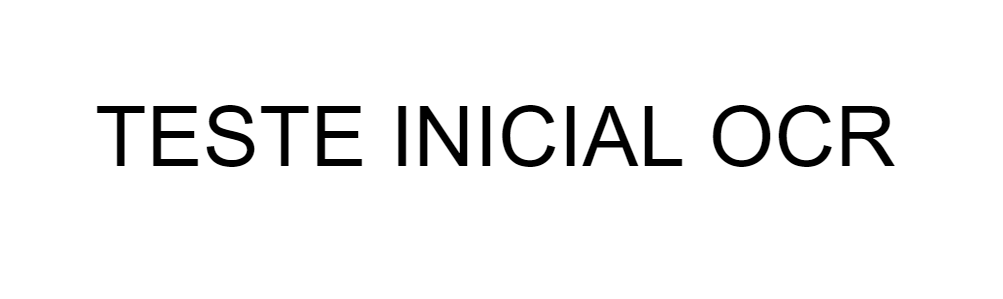

In [ ]:
img = cv2.imread('/content/text-recognize/Imagens/Aula1-teste.png')
cv2_imshow(img)

In [ ]:
texto = pytesseract.image_to_string(img)
print(texto)

TESTE INICIAL OCR



###Entendendo Sobre Tratamento de Cores / Imagens BGR




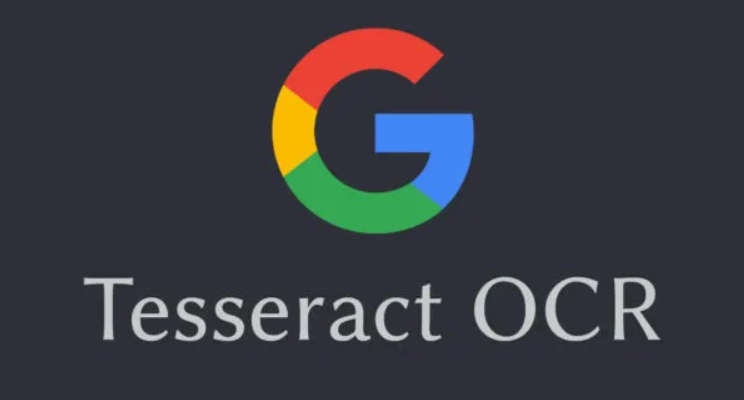

In [ ]:
img = cv2.imread('/content/text-recognize/Imagens/Aula1-ocr.png')
cv2_imshow(img)

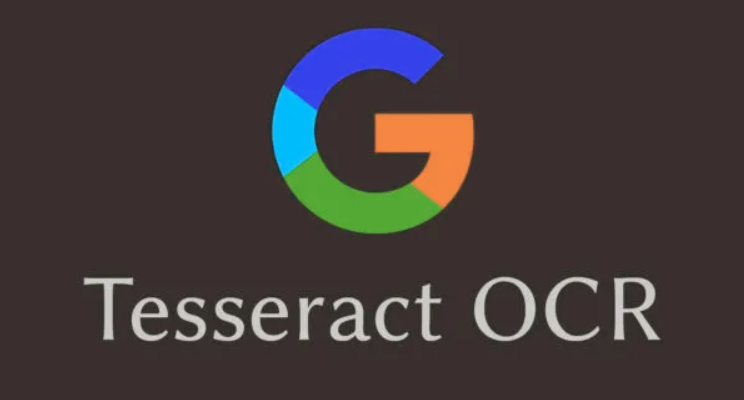

In [ ]:
rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
cv2_imshow(rgb)


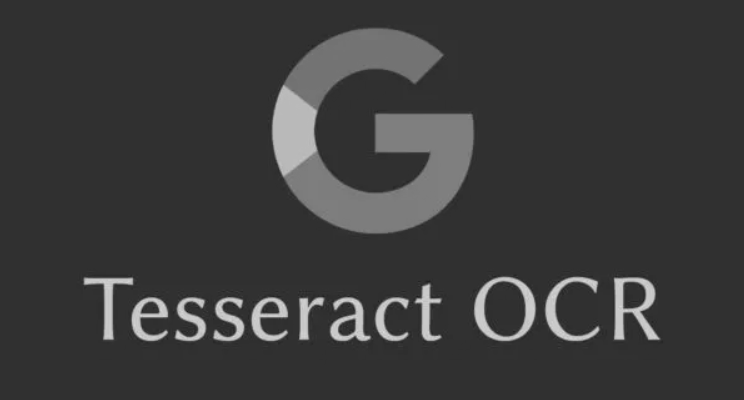

In [ ]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
cv2_imshow(gray)


In [ ]:
texto = pytesseract.image_to_string(img)
print(texto)


c

Tesseract OCR



In [ ]:
texto = pytesseract.image_to_string(rgb)
print(texto)


c

Tesseract OCR



In [ ]:
texto = pytesseract.image_to_string(gray)
print(texto)


C

Tesseract OCR



#Aula 2 - Explorando o Tesseract


###Caracteres Diferente

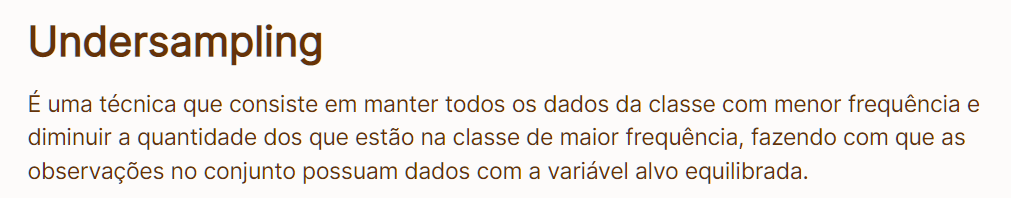

In [ ]:
img = cv2.imread('/content/text-recognize/Imagens/Aula2-undersampling.png')
rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
cv2_imshow(rgb)



In [ ]:
texto = pytesseract.image_to_string(rgb)
print(texto)

Undersampling

E uma técnica que consiste em manter todos os dados da classe com menor frequéncia e
diminuir a quantidade dos que estdo na classe de maior frequéncia, fazendo com que as
observagées no conjunto possuam dados com a variavel alvo equilibrada.



Para arrumar os erros de acentos e palavras podemos corrigir trocando a linguagem padrão

In [ ]:
!tesseract --list-langs


List of available languages (2):
eng
osd


Perceba que a lista possui apenas as linguagens osd e eng. Podemos instalar a linguagem portugues da seguinte maneira

In [ ]:
!apt-get install tesseract-ocr-por


Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  tesseract-ocr-por
0 upgraded, 1 newly installed, 0 to remove and 34 not upgraded.
Need to get 856 kB of archives.
After this operation, 1,998 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal/universe amd64 tesseract-ocr-por all 1:4.00~git30-7274cfa-1 [856 kB]
Fetched 856 kB in 0s (2,351 kB/s)
Selecting previously unselected package tesseract-ocr-por.
(Reading database ... 122592 files and directories currently installed.)
Preparing to unpack .../tesseract-ocr-por_1%3a4.00~git30-7274cfa-1_all.deb ...
Unpacking tesseract-ocr-por (1:4.00~git30-7274cfa-1) ...
Setting up tesseract-ocr-por (1:4.00~git30-7274cfa-1) ...


In [ ]:
!tesseract --list-langs


List of available languages (3):
eng
osd
por


In [ ]:
texto = pytesseract.image_to_string(rgb, lang='por')
print(texto)


Undersampling

É uma técnica que consiste em manter todos os dados da classe com menor frequência e
diminuir a quantidade dos que estão na classe de maior frequência, fazendo com que as
observações no conjunto possuam dados com a variável alvo equilibrada.



Com o texto configurado em portugues temos o retorno que esperamos

###PSM

Para verificar todos os PSMs disponiveis no tesseract

In [ ]:
!tesseract --help-psm


Page segmentation modes:
  0    Orientation and script detection (OSD) only.
  1    Automatic page segmentation with OSD.
  2    Automatic page segmentation, but no OSD, or OCR. (not implemented)
  3    Fully automatic page segmentation, but no OSD. (Default)
  4    Assume a single column of text of variable sizes.
  5    Assume a single uniform block of vertically aligned text.
  6    Assume a single uniform block of text.
  7    Treat the image as a single text line.
  8    Treat the image as a single word.
  9    Treat the image as a single word in a circle.
 10    Treat the image as a single character.
 11    Sparse text. Find as much text as possible in no particular order.
 12    Sparse text with OSD.
 13    Raw line. Treat the image as a single text line,
       bypassing hacks that are Tesseract-specific.


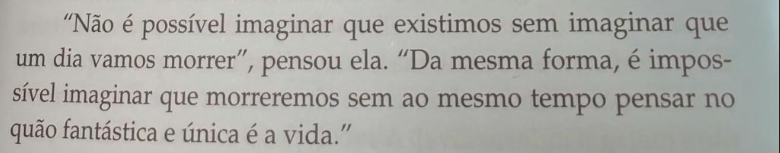

In [ ]:
img = cv2.imread('/content/text-recognize/Imagens/Aula2-trecho-livro.png')
rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
cv2_imshow(rgb)


Definindo o caminho do Tessdata

In [ ]:
!mkdir tessdata
!wget -O ./tessdata/por.traineddata https://github.com/tesseract-ocr/tessdata/blob/main/por.traineddata?raw=true
!wget -O ./tessdata/eng.traineddata https://github.com/tesseract-ocr/tessdata/blob/main/eng.traineddata?raw=true

--2023-05-27 15:33:52--  https://github.com/tesseract-ocr/tessdata/blob/main/por.traineddata?raw=true
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/tesseract-ocr/tessdata/raw/main/por.traineddata [following]
--2023-05-27 15:33:53--  https://github.com/tesseract-ocr/tessdata/raw/main/por.traineddata
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/tesseract-ocr/tessdata/main/por.traineddata [following]
--2023-05-27 15:33:53--  https://raw.githubusercontent.com/tesseract-ocr/tessdata/main/por.traineddata
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awa

Resultado sem PSM

In [ ]:
config_tesseract = '--tessdata-dir tessdata'
texto = pytesseract.image_to_string(rgb, lang='por', config=config_tesseract)
print(texto)


“Não é possível imaginar que existimos sem imaginar que
um dia vamos morrer”, pensou ela. “Da mesma forma, é impos-
sível imaginar que morreremos sem ao mesmo tempo pensar no
quão fantástica e única é a vida.”



Resultado com PSM 6

In [ ]:
config_tesseract = '--tessdata-dir tessdata --psm 6'
texto = pytesseract.image_to_string(rgb, lang='por', config=config_tesseract)
print(texto)


“Não é possível imaginar que existimos sem imaginar que
um dia vamos morrer”, pensou ela. “Da mesma forma, é impos-
sível imaginar que morreremos sem ao mesmo tempo pensar no
quão fantástica e única é a vida.”



Resultado com PSM 7

In [ ]:
config_tesseract = '--tessdata-dir tessdata --psm 7'
texto = pytesseract.image_to_string(rgb, lang='por', config=config_tesseract)
print(texto)


###PIL


In [ ]:
from PIL import Image
import matplotlib.pyplot as plt

Abrindo a imagem

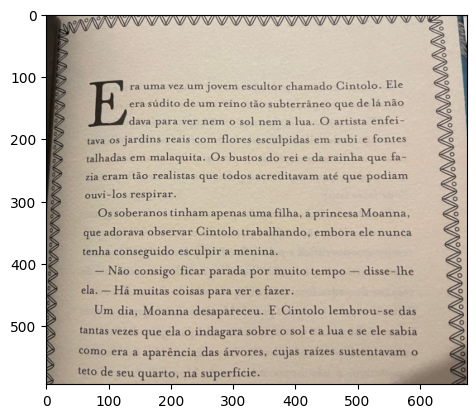

In [ ]:
img = Image.open('/content/text-recognize/Imagens/Aula2-livro.png')
plt.imshow(img);

Pegando os metadados da imagem

In [ ]:
print(pytesseract.image_to_osd(img))


Page number: 0
Orientation in degrees: 0
Rotate: 0
Orientation confidence: 0.93
Script: Latin
Script confidence: 2.46



#Aula 3 Delimitando o Texto

###Config Delimitação

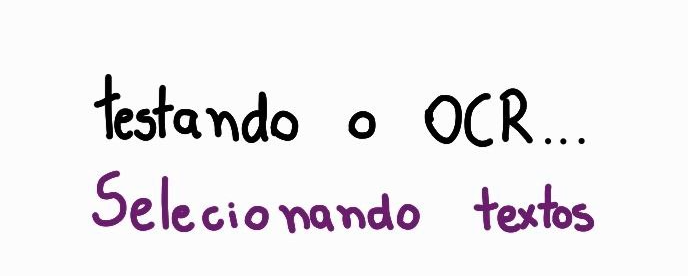

In [ ]:
img = cv2.imread('/content/text-recognize/Imagens/Aula3-testando.png')
rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
cv2_imshow(rgb)


In [ ]:
from pytesseract import Output


In [ ]:
config_tesseract = '--tessdata-dir tessdata'
resultado = pytesseract.image_to_data(rgb, config=config_tesseract, lang='por', output_type=Output.DICT)
resultado

{'level': [1, 2, 3, 4, 5, 5, 5, 4, 5, 5],
 'page_num': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
 'block_num': [0, 1, 1, 1, 1, 1, 1, 1, 1, 1],
 'par_num': [0, 0, 1, 1, 1, 1, 1, 1, 1, 1],
 'line_num': [0, 0, 0, 1, 1, 1, 1, 2, 2, 2],
 'word_num': [0, 0, 0, 0, 1, 2, 3, 0, 1, 2],
 'left': [0, 92, 92, 94, 94, 348, 425, 92, 92, 474],
 'top': [0, 74, 74, 74, 74, 111, 88, 171, 171, 184],
 'width': [688, 502, 502, 491, 204, 28, 160, 502, 328, 120],
 'height': [276, 159, 159, 73, 69, 28, 59, 62, 62, 49],
 'conf': ['-1', '-1', '-1', '-1', 63, 90, 48, '-1', 85, 77],
 'text': ['',
  '',
  '',
  '',
  'Testando',
  'o',
  'OCR..',
  '',
  'Selecionando',
  'textos']}

In [ ]:
min_conf = 42 #@param {type: 'slider', min: 1, max: 100}


###Bounding Box

In [ ]:
def caixa_texto(resultado, img ,cor = (225, 100, 0)):
  x = resultado['left'][i]
  y = resultado['top'][i]
  w = resultado['width'][i]
  h = resultado['height'][i]

  cv2.rectangle(img,(x,y), (x+w ,y + h), cor , 2 )

  return x, y, img

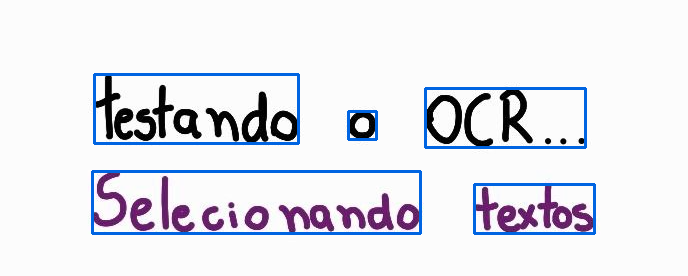

In [ ]:
img_copia = rgb.copy()
for i in range(len(resultado['text'])):
  confianca = int(resultado['conf'][i])
  if confianca > min_conf:
    x, y, img = caixa_texto(resultado, img_copia)
cv2_imshow(img_copia)

###Caixa Texto


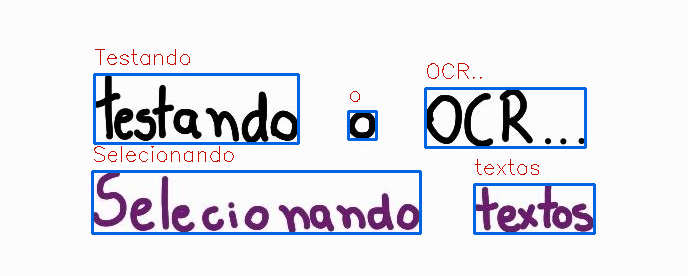

In [ ]:
img_copia = rgb.copy()
for i in range(len(resultado['text'])):
  confianca = int(resultado['conf'][i])
  if confianca > min_conf:
    x, y, img = caixa_texto(resultado, img_copia)

    texto = resultado['text'][i]
    cv2.putText(img_copia, texto, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0,10,200))

cv2_imshow(img_copia)


###Fonte

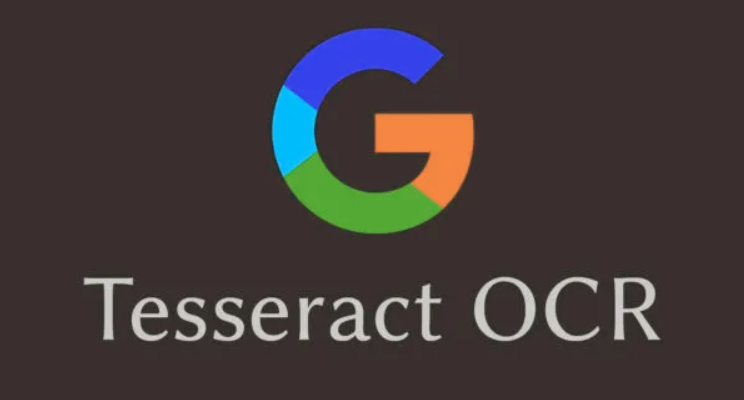

In [ ]:
img = cv2.imread('/content/text-recognize/Imagens/Aula1-ocr.png')
rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
cv2_imshow(rgb)


In [ ]:
config_tesseract = '--tessdata-dir tessdata'
resultado = pytesseract.image_to_data(rgb, config=config_tesseract, lang='por', output_type=Output.DICT)
resultado


{'level': [1, 2, 3, 4, 5, 2, 3, 4, 5, 5],
 'page_num': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
 'block_num': [0, 1, 1, 1, 1, 2, 2, 2, 2, 2],
 'par_num': [0, 0, 1, 1, 1, 0, 1, 1, 1, 1],
 'line_num': [0, 0, 0, 1, 1, 0, 0, 1, 1, 1],
 'word_num': [0, 0, 0, 0, 1, 0, 0, 0, 1, 2],
 'left': [0, 272, 272, 272, 272, 84, 84, 84, 84, 474],
 'top': [0, 28, 28, 28, 28, 277, 277, 277, 278, 277],
 'width': [744, 202, 202, 202, 202, 576, 576, 576, 357, 186],
 'height': [400, 205, 205, 205, 205, 64, 64, 64, 63, 64],
 'conf': ['-1', '-1', '-1', '-1', 91, '-1', '-1', '-1', 91, 90],
 'text': ['', '', '', '', 'G', '', '', '', 'Tesseract', 'OCR']}

In [ ]:
from PIL import ImageFont, ImageDraw, Image

fonte = '/content/text-recognize/Imagens/calibri.ttf'


In [ ]:
def escreve_texto(texto, x, y, img, fonte, tamanho_texto=32):
  fonte = ImageFont.truetype(fonte, tamanho_texto)
  img_pil = Image.fromarray(img)
  draw = ImageDraw.Draw(img_pil)
  draw.text((x, y - tamanho_texto), texto, font = fonte)
  img = np.array(img_pil)
  return img


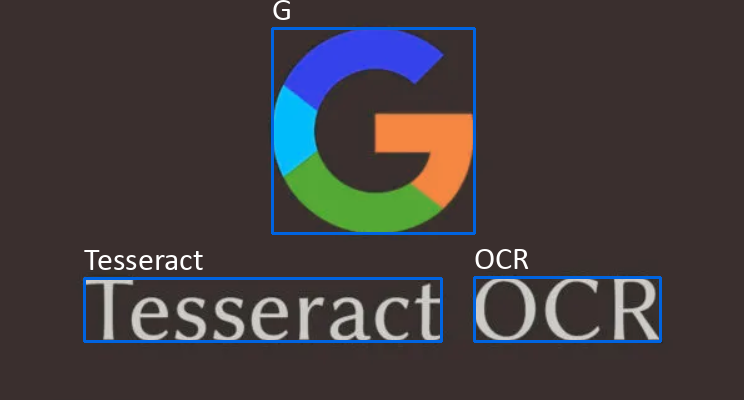

In [ ]:
img_copia = rgb.copy()
for i in range(len(resultado['text'])):
  confianca = int(resultado['conf'][i])
  if confianca > min_conf:
    x, y, img = caixa_texto(resultado, img_copia)

    texto = resultado['text'][i]
    #cv2.putText(img_copia, texto, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0,100,255))
    img_copia = escreve_texto(texto, x, y, img_copia, fonte)

cv2_imshow(img_copia)


#Aula 4 - Cenarios Complexos

###Busca de informações

In [ ]:
import re

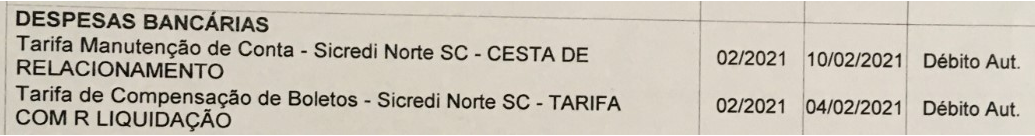

In [ ]:
img = cv2.imread('/content/text-recognize/Imagens/Aula4-tabela_teste.png')
rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
cv2_imshow(rgb)


In [ ]:
config_tesseract = "--tessdata-dir tessdata"
resultado = pytesseract.image_to_data(rgb, config=config_tesseract, lang="por", output_type=Output.DICT)
resultado


{'level': [1,
  2,
  3,
  4,
  5,
  5,
  2,
  3,
  4,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  4,
  5,
  4,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  2,
  3,
  4,
  5,
  5,
  5],
 'page_num': [1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1],
 'block_num': [0,
  1,
  1,
  1,
  1,
  1,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  3,
  3,
  3,
  3,
  3,
  3],
 'par_num': [0,
  0,
  1,
  1,
  1,
  1,
  0,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  0,
  1,
  1,
  1,
  

In [ ]:
padrao_data = '^(0[1-9]|[12][0-9]|3[01])/(0[1-9]|1[012])/(19|20)\d\d$'

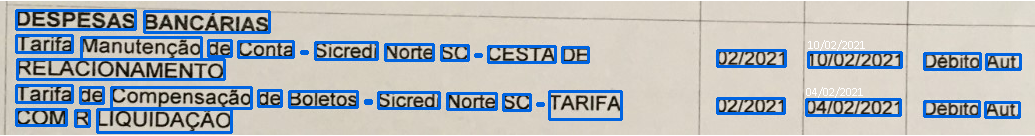

In [ ]:
img_copia = rgb.copy()
for i in range(0, len(resultado['text'])):
  confianca = int(resultado['conf'][i])
  if confianca > min_conf:
    texto = resultado['text'][i]

    if re.match(padrao_data, texto):
      x, y, img = caixa_texto(resultado, img_copia)
      img_copia = escreve_texto(texto, x, y, img_copia, fonte, 12)
    else:
      x, y, img_copia = caixa_texto(resultado, img_copia)

cv2_imshow(img_copia)


###Destacando as informções

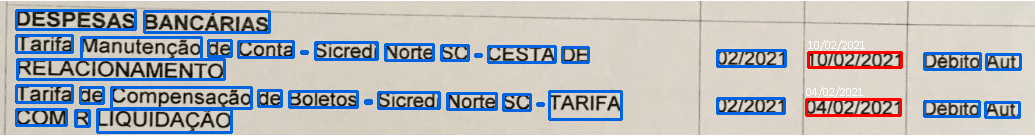

In [ ]:
datas = []
img_copia = rgb.copy()
for i in range(0, len(resultado['text'])):
  confianca = int(resultado['conf'][i])
  if confianca > min_conf:
    texto = resultado['text'][i]

    if re.match(padrao_data, texto):
      x, y, img = caixa_texto(resultado, img_copia, (0,0,255))
      img_copia = escreve_texto(texto, x, y, img_copia, fonte, 12)
      datas.append(texto)
    else:
      x, y, img_copia = caixa_texto(resultado, img_copia)


cv2_imshow(img_copia)


In [ ]:
datas

['10/02/2021', '04/02/2021']

### Exercicio

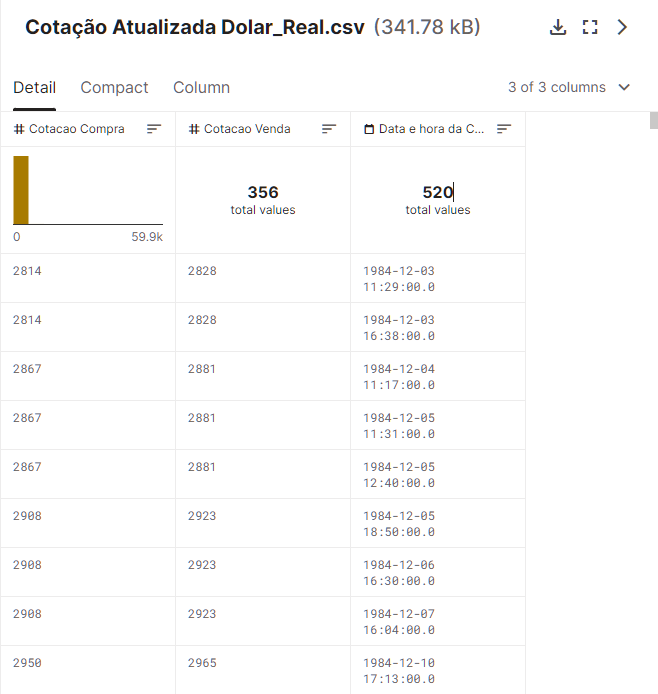

In [ ]:
img = cv2.imread('/content/text-recognize/Atividades/Aula4_cotacao.png')
rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
cv2_imshow(rgb)

In [ ]:
config_tesseract = 'tesseract-dir tessdata'
resultado = pytesseract.image_to_data(rgb, config=config_tesseract, lang="eng", output_type=Output.DICT)
resultado

{'level': [1,
  2,
  3,
  4,
  5,
  5,
  5,
  5,
  5,
  2,
  3,
  4,
  5,
  5,
  2,
  3,
  4,
  5,
  2,
  3,
  4,
  5,
  5,
  5,
  2,
  3,
  4,
  5,
  5,
  2,
  3,
  4,
  5,
  2,
  3,
  4,
  5,
  2,
  3,
  4,
  5,
  2,
  3,
  4,
  5,
  2,
  3,
  4,
  5,
  2,
  3,
  4,
  5,
  2,
  3,
  4,
  5,
  2,
  3,
  4,
  5,
  2,
  3,
  4,
  5,
  2,
  3,
  4,
  5,
  2,
  3,
  4,
  5,
  5,
  5,
  2,
  3,
  4,
  5,
  2,
  3,
  4,
  5,
  2,
  3,
  4,
  5,
  2,
  3,
  4,
  5,
  2,
  3,
  4,
  5,
  2,
  3,
  4,
  5,
  2,
  3,
  4,
  5,
  2,
  3,
  4,
  5,
  2,
  3,
  4,
  5,
  2,
  3,
  4,
  5,
  2,
  3,
  4,
  5,
  2,
  3,
  4,
  5,
  5,
  2,
  3,
  4,
  5,
  5,
  5,
  2,
  3,
  4,
  5,
  2,
  3,
  4,
  5,
  5,
  2,
  3,
  4,
  5,
  4,
  5,
  2,
  3,
  4,
  5,
  4,
  5,
  2,
  3,
  4,
  5,
  4,
  5,
  2,
  3,
  4,
  5,
  4,
  5,
  2,
  3,
  4,
  5,
  4,
  5,
  2,
  3,
  4,
  5,
  4,
  5,
  2,
  3,
  4,
  5,
  4,
  5,
  2,
  3,
  4,
  5,
  4,
  5,
  2,
  3,
  4,
  5,
  4,
  5],
 'page_num': [1,
  1,
  1

padrao_hora = "([01]?[0-9]|2[0-3]):[0-5][0-9](:[0-5][0-9])?"
img_copia = rgb.copy()
for i in range(0, len(resultado['text'])):
  confianca = int(resultado['conf'][i])
  if confianca > min_conf:
    text = resultado['text'][i]

    if re.match(padrao_hora,text):
      x, y, img = caixa_texto(resultado, img_copia, (0,0,255))
    else:
      x, y, img_copia = caixa_texto(resultado, img_copia)
cv2_imshow(img_copia)



###Cenarios Naturais


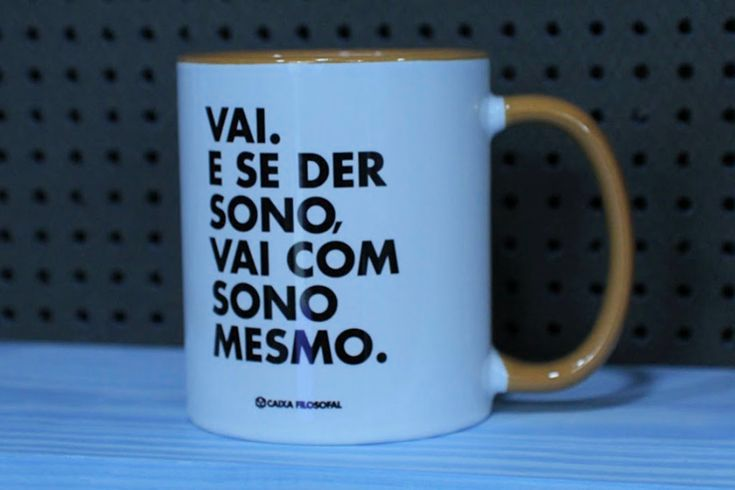

In [ ]:
img = cv2.imread("/content/text-recognize/Imagens/Aula4-caneca2.jpg")
rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
cv2_imshow(rgb)

In [ ]:
config_tesseract = '--tessdata-dir tessdata --psm 6'

In [ ]:
min_conf = 40 #@param {type:"slider", min:0, max:100}

In [ ]:
resultado = pytesseract.image_to_data(rgb, lang='por', output_type=Output.DICT, config=config_tesseract)
resultado

{'level': [1,
  2,
  3,
  4,
  5,
  5,
  3,
  4,
  5,
  5,
  5,
  3,
  4,
  5,
  3,
  4,
  5,
  5,
  3,
  4,
  5,
  3,
  4,
  5,
  5],
 'page_num': [1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1],
 'block_num': [0,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1],
 'par_num': [0,
  0,
  1,
  1,
  1,
  1,
  2,
  2,
  2,
  2,
  2,
  3,
  3,
  3,
  4,
  4,
  4,
  4,
  5,
  5,
  5,
  6,
  6,
  6,
  6],
 'line_num': [0,
  0,
  0,
  1,
  1,
  1,
  0,
  1,
  1,
  1,
  1,
  0,
  1,
  1,
  0,
  1,
  1,
  1,
  0,
  1,
  1,
  0,
  1,
  1,
  1],
 'word_num': [0,
  0,
  0,
  0,
  1,
  2,
  0,
  0,
  1,
  2,
  3,
  0,
  0,
  1,
  0,
  0,
  1,
  2,
  0,
  0,
  1,
  0,
  0,
  1,
  2],
 'left': [0,
  206,
  206,
  206,
  206,
  584,
  209,
  209,
  209,
  237,
  299,
  210,
  210,
  210,
  210,
  210,
  210,
  287,
  213,
  213,
  213,
  214,
  214,
  214,
 

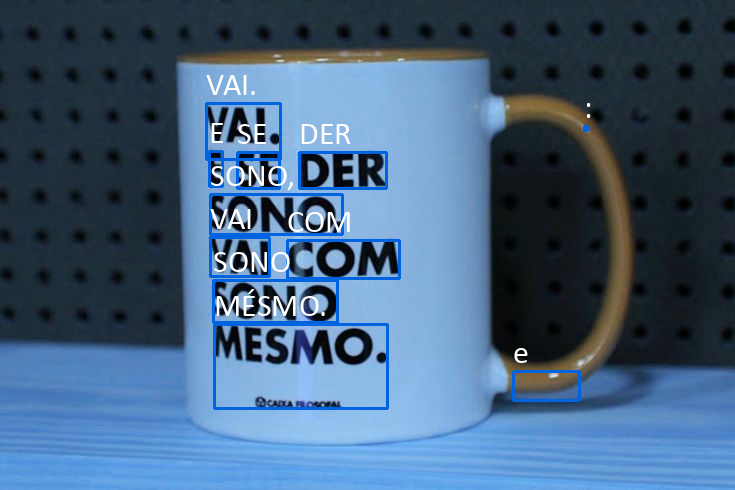

In [ ]:
img_copia = rgb.copy()
for i in range(0, len(resultado['text'])):
  confianca = int(resultado['conf'][i])
  if confianca > min_conf:
    x, y, img = caixa_texto(resultado, img_copia)
    texto = resultado['text'][i]
    img_copia = escreve_texto(texto, x, y, img_copia, fonte)
cv2_imshow(img_copia)

Quando pegamos cenarios naturais sem tratamento podemos nos deparar com alguns erros que precisamos trata-los.
A maneira mais simples possivel de resolver os problemas dos falsos positivos é limitando as palavras


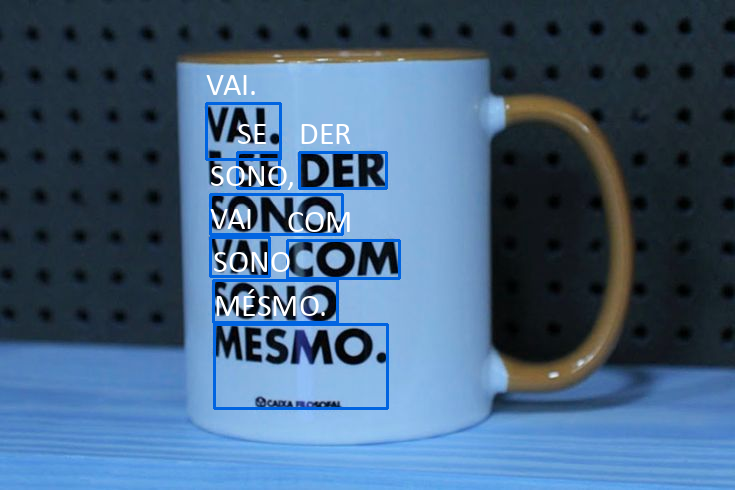

In [ ]:
img_copia = rgb.copy()
for i in range(0, len(resultado['text'])):
  confianca = int(resultado['conf'][i])
  if confianca > min_conf:
    texto = resultado['text'][i]
    if len(texto) > 1 and not texto.isspace():  

      x, y, img = caixa_texto(resultado, img_copia)
      img_copia = escreve_texto(texto, x, y, img_copia, fonte)
cv2_imshow(img_copia)